# K-means Clustering Example with the Mall Customers Dataset

## Introduction

In this activity, we will perform a K-means clustering analysis using the Mall Customers dataset. The objective is to cluster the customers into distinct groups based on their spending patterns. This exercise will help you understand the process of implementing and evaluating a K-means clustering model.

## The Dataset

The Mall Customers dataset contains the following features:
- `CustomerID`: Unique ID assigned to the customer
- `Gender`: Gender of the customer
- `Age`: Age of the customer
- `Annual Income (k$)`: Annual income of the customer in thousand dollars
- `Spending Score (1-100)`: Spending score assigned by the mall based on customer behavior and spending nature


## Objective

You will:
    1. Load and explore the dataset.
    2. Preprocess the data.
    3. Determine the optimal number of clusters using the elbow method.
    4. Implement the K-means clustering algorithm.
    5. Evaluate the model's performance.
    6. Visualize the clusters.

Let's get started!

## Import necessary libraries

In [1]:
# For Windows users: Set the number of threads to 1 to avoid problems with KMeans
import os
os.environ['OMP_NUM_THREADS'] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Load the Mall Customers dataset

In [2]:
# Load the Mall Customers dataset
data = pd.read_csv("data\Mall_Customers.csv")
# Display the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing

- Select relevant features and standardize them using `StandardScaler`.

In [3]:
# Select relevant features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data_features = data[features]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

## Determining the Optimal Number of Clusters

- Use the elbow method to find the optimal number of clusters by plotting the inertia for a range of cluster numbers.

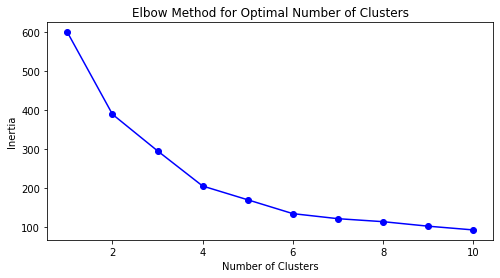

In [4]:
# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init = 'auto', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

## Implementing K-means Clustering

- Create an instance of `KMeans` with the optimal number of clusters and fit it to the scaled data.

In [5]:
# Create an instance of KMeans with the optimal number of clusters
optimal_clusters = 5  # Assume 5 is determined as the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init = 'auto', random_state=42)

# Fit the model to the scaled data
data['cluster'] = kmeans.fit_predict(data_scaled)

## Evaluating the Mode

- Calculate the silhouette score for the model.

In [6]:
# Calculate the silhouette score for the model
silhouette_avg = silhouette_score(data_scaled, data['cluster'])

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.40846873777345605


## Visualize the clusters

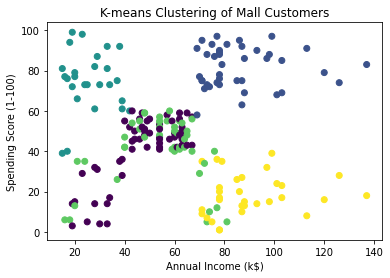

In [7]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering of Mall Customers')
plt.show()

## Discussion Questions:
    1. What does the silhouette score indicate about the quality of the clusters?

The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. Scores close to +1 suggest that the samples are far away from the neighboring clusters, whereas scores close to 0 indicate that the sample is on or very close to the decision boundary between two neighboring clusters. Scores below 0 indicate that the samples might have been assigned to the wrong cluster.

    2. How well do the clusters correspond to different types of customers based on their spending patterns?

To assess this, you would analyze the distribution of clusters and see if they group customers with similar spending patterns. For example, you might find clusters corresponding to high-income, high-spending customers, or low-income, low-spending customers. Visualizing the clusters can help identify these patterns.

    3. Are there any improvements you can suggest for the clustering model?

Potential improvements could include tuning the number of clusters, trying different initialization methods, using different scaling techniques, or applying more advanced clustering algorithms. Evaluating different models and parameters can help improve the clustering performance.